# Macroeconomic Indicators Dashboard
This notebook visualizes key macroeconomic indicators against market volatility (VIX) and highlights NBER-defined recession periods.

In [2]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

# Configuration
start = datetime.datetime(1990, 1, 1)
end = datetime.datetime.now()

def plot_macro_indicator(ticker, title, ylabel, is_pct_change=False):
    # Fetch indicator, VIX, and Recession data
    data = web.DataReader([ticker, 'VIXCLS', 'USREC'], 'fred', start, end).ffill()
    
    if is_pct_change:
        data[ticker] = data[ticker].pct_change(12) * 100
    
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot Primary Indicator
    ax1.plot(data.index, data[ticker], color='tab:blue', lw=2, label=title)
    ax1.set_ylabel(ylabel, color='tab:blue', fontweight='bold')
    
    # Plot VIX
    ax2 = ax1.twinx()
    ax2.plot(data.index, data['VIXCLS'], color='tab:red', alpha=0.3, label='VIX (Fear Index)')
    ax2.set_ylabel('VIX Index', color='tab:red')

    # Add Recession Shading
    ax1.fill_between(data.index, data[ticker].min(), data[ticker].max(), 
                     where=(data['USREC'] == 1), color='gray', alpha=0.2, label='Recession')

    plt.title(f'{title} vs. Market Volatility', fontsize=14)
    ax1.grid(alpha=0.3)
    plt.show()

## 1. Ratio of Manufacturing & Trade Inventory to Sales
- Definition: Measures the amount of inventory held relative to monthly sales.Source: FRED (ISRATIO)
- Formula: $\frac{\text{Total Inventory}}{\text{Total Sales}}$
- Impact: A rising ratio suggests products are "piling up," often signaling a slowdown in consumer demand and upcoming production cuts (Negative for equities).

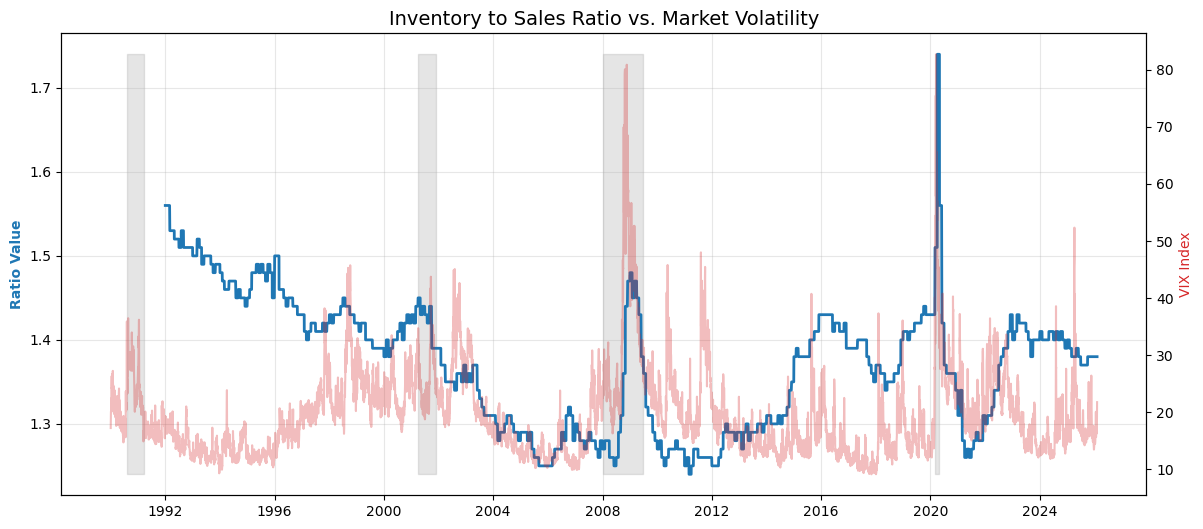

In [3]:
plot_macro_indicator('ISRATIO', 'Inventory to Sales Ratio', 'Ratio Value')

## 2. Monthly Retail Trade & Food Services
- Definition: Tracks the total receipts at stores that sell merchandise and food.Source: FRED (RETAILMSL)
- Formula: $YoY\% = \frac{\text{Sales}_t - \text{Sales}_{t-12}}{\text{Sales}_{t-12}}$
- Impact: Strong retail sales indicate healthy consumer confidence and corporate revenue (Positive for equities).

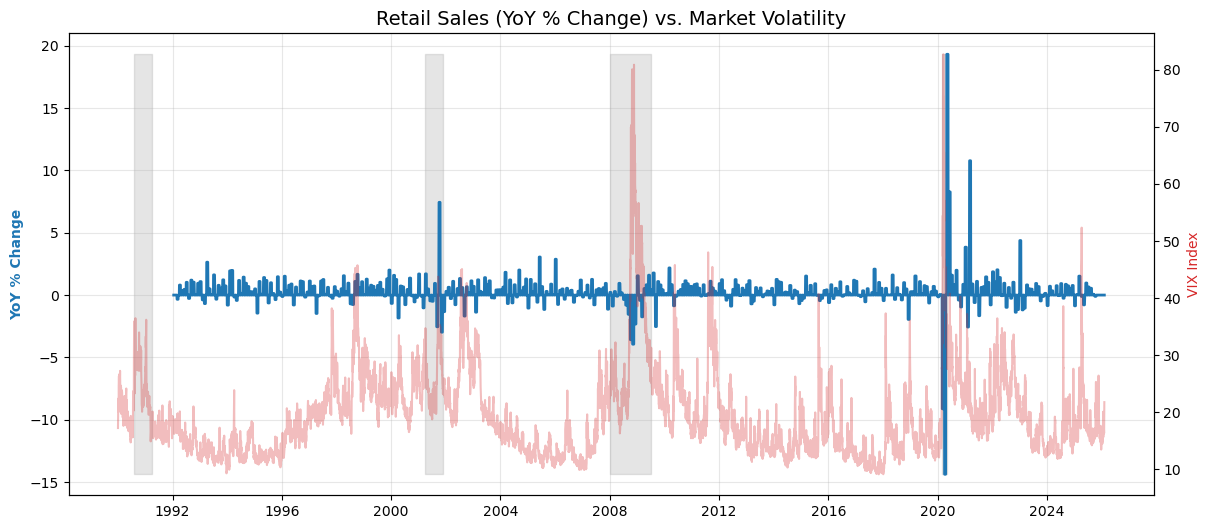

In [10]:
plot_macro_indicator('MRTSSM44X72USS', 'Retail Sales (YoY % Change)', 'YoY % Change', is_pct_change=True)

## 3. Average Prime Rate
- Definition: The interest rate commercial banks charge their most creditworthy corporate customers.
- Source: FRED (MPRIME)
- Impact: As the Prime Rate rises, the cost of capital increases, making it more expensive for companies to grow and consumers to borrow (Negative for equities).

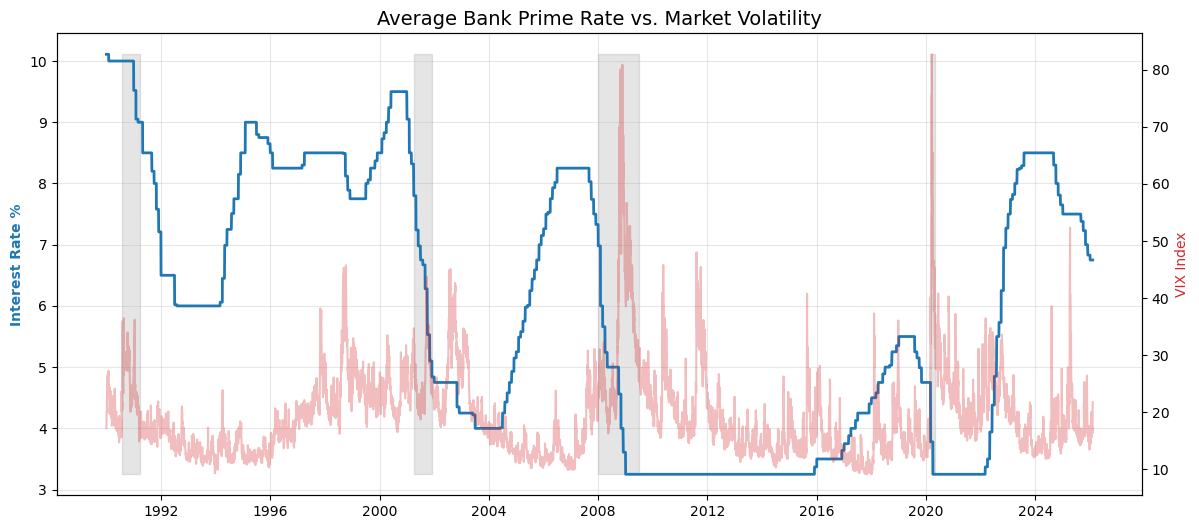

In [5]:
plot_macro_indicator('MPRIME', 'Average Bank Prime Rate', 'Interest Rate %')

## 4. Commercial and Industrial (C&I) Loans
- Definition: Loans made to businesses for capital investment or working capital.
- Source: FRED (BUSLOANS)
- Impact: Expanding C&I loans signal business optimism and credit availability. A sharp drop often indicates a "Credit Crunch" (Positive for growth; Negative if declining).

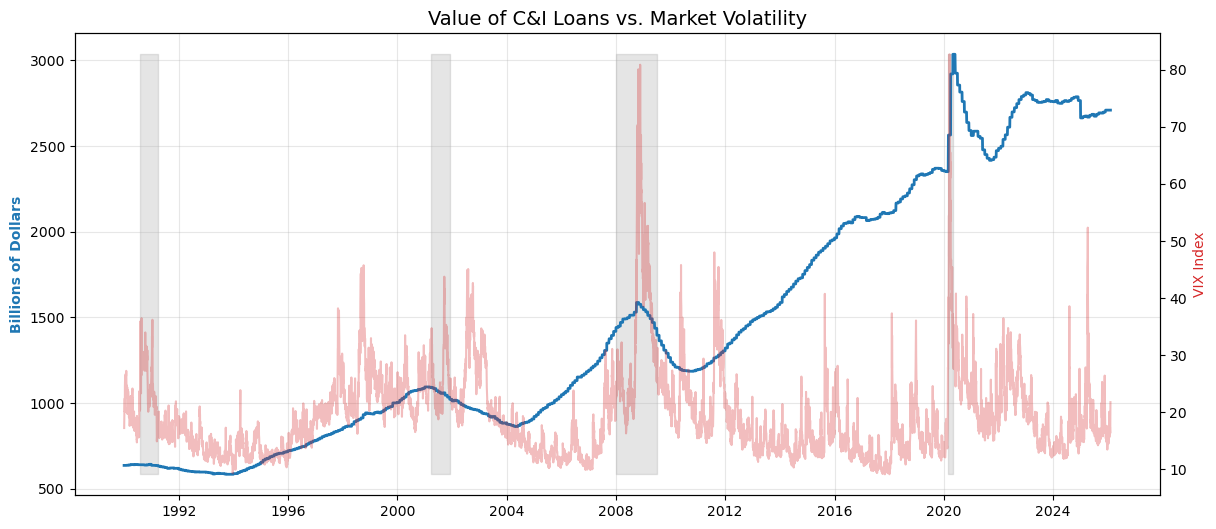

In [6]:
plot_macro_indicator('BUSLOANS', 'Value of C&I Loans', 'Billions of Dollars')

## 5. Unit Labor Costs (ULC)
- Definition: The ratio of hourly compensation to labor productivity.
- Source: BLS via FRED (ULCNFB)Formula: $\frac{\text{Wages}}{\text{Output}}$
- Impact: Rising ULCs indicate that labor is becoming more expensive relative to productivity, which can compress profit margins if companies cannot raise prices (Negative for equities).

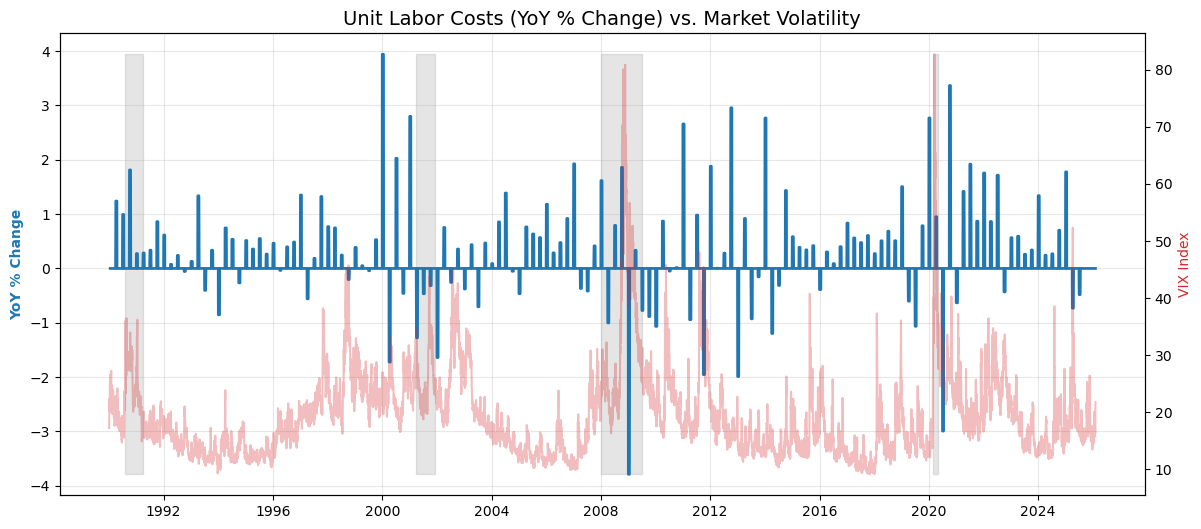

In [7]:
plot_macro_indicator('ULCNFB', 'Unit Labor Costs (YoY % Change)', 'YoY % Change', is_pct_change=True)

## 6. Unemployment Claims Rate
- Definition: The number of initial filings for unemployment insurance.
- Source: FRED (ICSA)
- Impact: This is a key leading indicator. A sustained rise in claims often precedes a recession by several months, while the VIX tends to spike shortly after (Negative for equities).

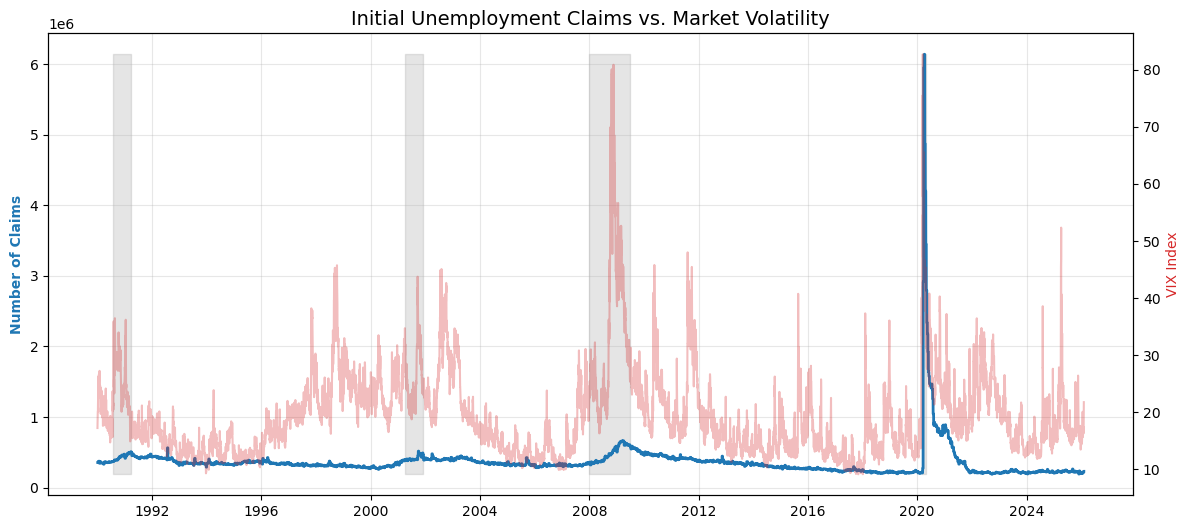

In [8]:
plot_macro_indicator('ICSA', 'Initial Unemployment Claims', 'Number of Claims')